In [2]:
%reload_ext nb_black
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly
import seaborn as sns

%matplotlib inline
from scipy import stats

plt.style.use(["dark_background"])
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from functions_pkg import print_vif
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_csv("mobile_price/train.csv")
# test_df = pd.read_csv("mobile_price/test.csv")
# test_df.columns
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


<IPython.core.display.Javascript object>

In [4]:
print_vif(df)

VIF results
-------------------------------
const            98.310368
battery_power     1.502606
blue              1.011353
clock_speed       1.006977
dual_sim          1.012936
fc                1.719149
four_g            1.528514
int_memory        1.011693
m_dep             1.006467
mobile_wt         1.014087
n_cores           1.008612
pc                1.720791
px_height         1.517050
px_width          1.505883
ram              11.381971
sc_h              1.356336
sc_w              1.353668
talk_time         1.010541
three_g           1.528673
touch_screen      1.006358
wifi              1.010230
price_range      12.289686
dtype: float64
-------------------------------



<IPython.core.display.Javascript object>

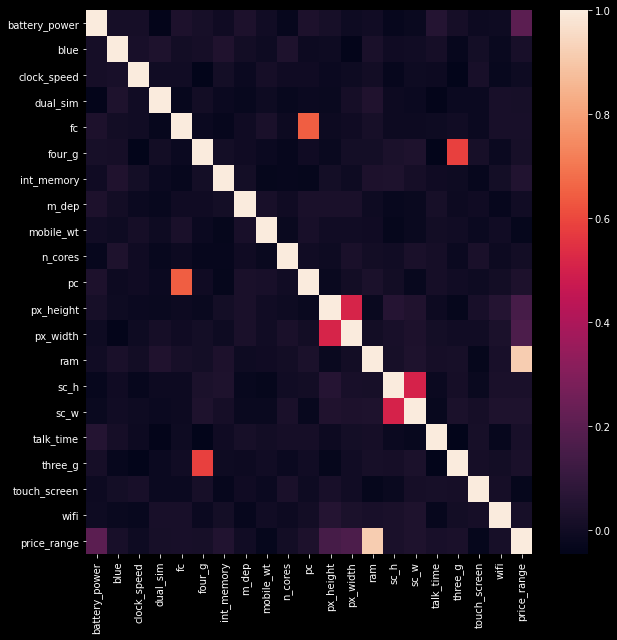

<IPython.core.display.Javascript object>

In [5]:
corr_mat = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_mat)
plt.show()

In [7]:
# split data into feature and target
X = df.drop(columns="price_range")
y = df.price_range

<IPython.core.display.Javascript object>

In [8]:
# scale the data
scaled_X = StandardScaler().fit_transform(X)

<IPython.core.display.Javascript object>

In [9]:
# linear regression estimator
lr_estimator = LinearRegression()

# RFE objects
lr_selector = RFE(lr_estimator, n_features_to_select=3, step=1)

# fit RFE objects
lr_selector = lr_selector.fit(X, y)

# top 3 important feature cols
lr_cols = lr_selector.support_

print("LR RFE features:\n====================")
print(X.columns[lr_cols])

LR RFE features:
Index(['blue', 'three_g', 'wifi'], dtype='object')


<IPython.core.display.Javascript object>

In [11]:
# xgbregressor estimator
xgb_estimator = XGBRegressor()

# rfe object
xgb_selector = RFE(xgb_estimator, n_features_to_select=3, step=1)

# fit RFE object
xgb_selector = xgb_selector.fit(X, y)

# top 3 important features
xgb_cols = xgb_selector.support_

print("\nXGB RFE features:\n====================")
print(X.columns[xgb_cols])


XGB RFE features:
Index(['battery_power', 'px_height', 'ram'], dtype='object')


<IPython.core.display.Javascript object>

In [13]:
# suppoort vector regressor estimator
svr_estimator = SVR(kernel="linear")

# RFE object
svr_selector = RFE(svr_estimator, n_features_to_select=3, step=3)

# fit RFE object
svr_selector = svr_selector.fit(X, y)

# svr top 3 features
svr_cols = svr_selector.support_

print("\nSVR RFE features:\n====================")
print(X.columns[svr_cols])

KeyboardInterrupt: 

<IPython.core.display.Javascript object>